In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('results_3c.csv')

In [29]:
# Performance dist_type, num_bins, 

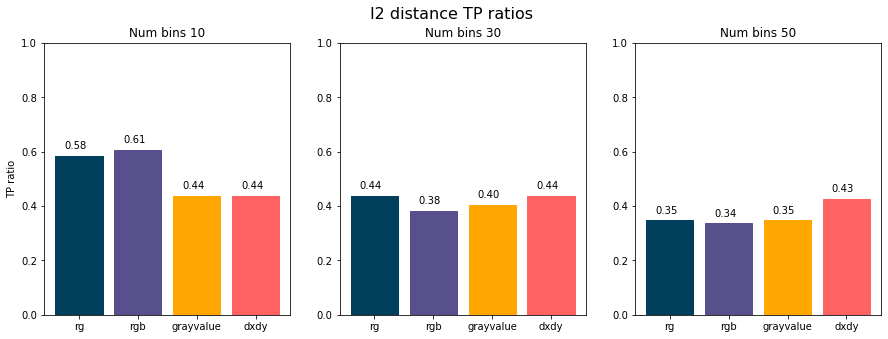

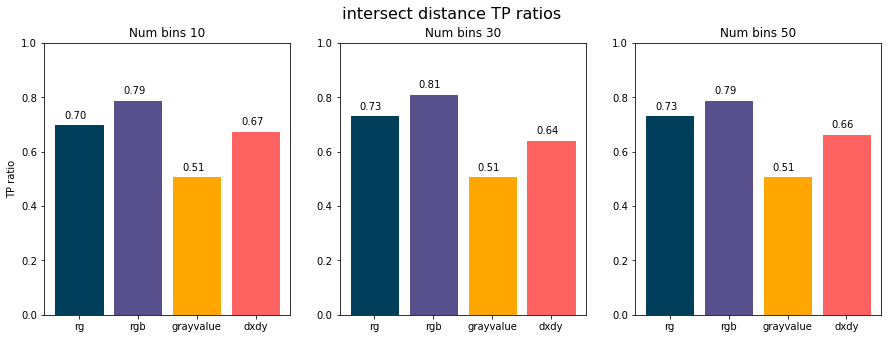

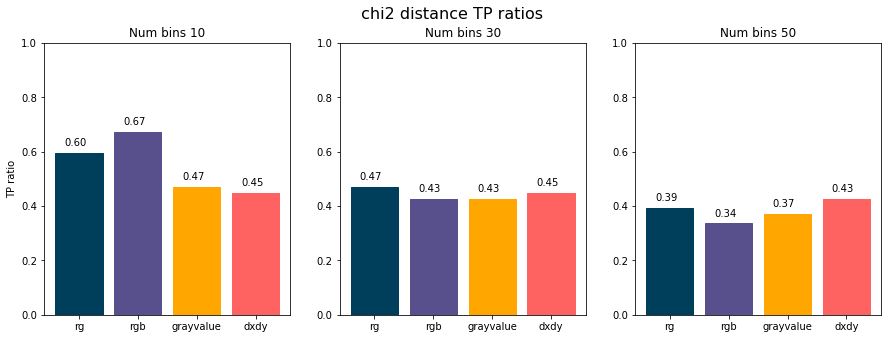

In [147]:
#for hist_type in results.hist_type.unique():

dist_type = 'l2'

colors_bar = {'rg':'#003f5c', 'rgb':'#58508d', 'dxdy':'#ff6361', 'grayvalue':'#ffa600'}

for dist_type in results.dist_type.unique():

    res = results[results.dist_type == dist_type]
    fig, ax = plt.subplots(1, 3)
    fig.suptitle(' %s distance TP ratios' % dist_type, fontsize=16)


    ax[0].set_ylabel('TP ratio')

    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, num_bins in zip(range(3), [10, 30, 50]):
        bin_n = res[res.num_bins == num_bins]
        #bin_n = bin_n.sort_values(by = 'num_correct_prop', ascending = False)

        ax[i].set_ylim([0,1])
        bars = ax[i].bar(bin_n['hist_type'].values, bin_n['num_correct_prop'].values, 
                        color=(0.1, 0, 0, 1))
        ax[i].set_title(str('Num bins %d' % num_bins))
        for j, bar in zip(range(len(bars)), bars):
            dist_type_color = colors_bar[bin_n['hist_type'].values[j]]
            bar.set_color(dist_type_color)
            y_val_str = str("%.2f" % bar.get_height())
            y_val = bar.get_height()
            ax[i].text(bar.get_x() + 0.15, y_val + 0.025, y_val_str)
            
    chart_title = dist_type + '_distance_chart.png'
    
    plt.savefig('plots/'+ chart_title)